In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import Sequential #help to initalise ann
from tensorflow.keras.layers import Dense #help to create hidden layer
from sklearn.metrics import mean_squared_error 

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


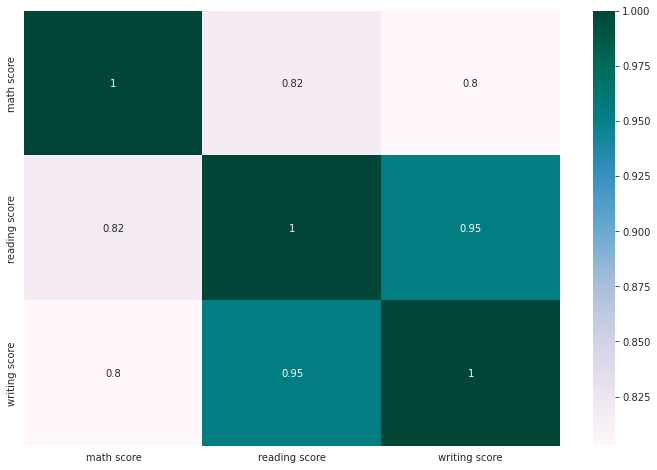

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="PuBuGn")
correlation = df.corr() 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender')

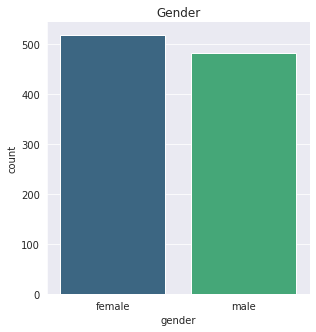

In [ ]:
sns.catplot(x='gender',kind='count',data=df,height=4.5,palette='viridis')
plt.title('Gender')

In [ ]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

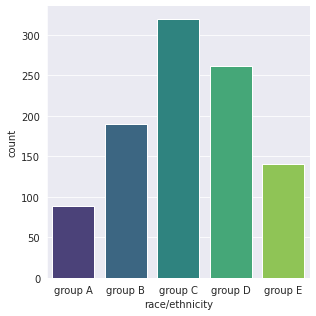

In [ ]:
df["race/ethnicity"].sort_values()
sns.catplot(x='race/ethnicity',kind='count',data=df,height=4.5,palette='viridis',
            order=['group A','group B','group C','group D','group E'])

In [ ]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

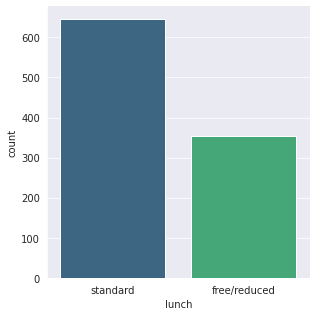

In [ ]:
sns.catplot(x='lunch',kind='count',data=df,height=4.5,palette='viridis')

In [ ]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

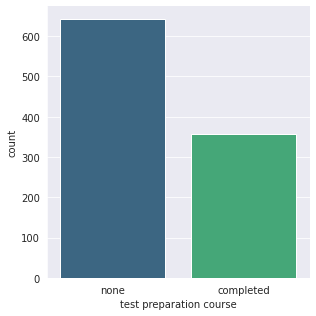

In [ ]:
sns.catplot(x='test preparation course',kind='count',data=df,height=4.5,palette='viridis')

In [ ]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

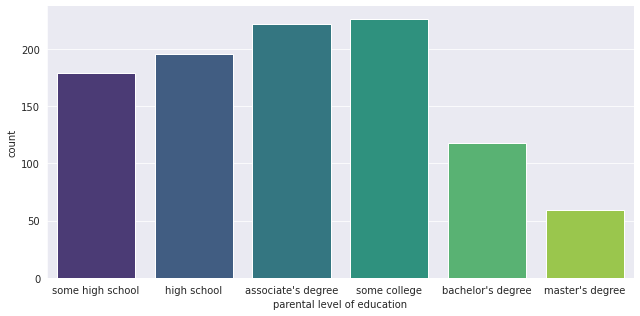

In [ ]:
df["race/ethnicity"].sort_values()
sns.catplot(x='parental level of education',kind='count',data=df,height=4.5,aspect=2,palette='viridis',
            order=["some high school","high school","associate's degree","some college",
                   "bachelor's degree","master's degree"],)

In [ ]:
df["average"]=df[["math score", "reading score", "writing score"]].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
df["total_score"]=df["math score"]+df["reading score"]+df["writing score"]
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_categorical=["gender", "race/ethnicity", "parental level of education","lunch", "test preparation course"]
le=LabelEncoder()

for i in df_categorical:
    df[i]=le.fit_transform(df[i])
    

In [ ]:
df.drop("total_score",axis=1,inplace=True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333


In [ ]:
df.shape

(1000, 9)

In [ ]:
x=df.iloc[:,0:8].values
x

array([[ 0,  1,  1, ..., 72, 72, 74],
       [ 0,  2,  4, ..., 69, 90, 88],
       [ 0,  1,  3, ..., 90, 95, 93],
       ...,
       [ 0,  2,  2, ..., 59, 71, 65],
       [ 0,  3,  4, ..., 68, 78, 77],
       [ 0,  3,  4, ..., 77, 86, 86]])

In [ ]:
y=df.iloc[:,-1].values
y

array([ 72.66666667,  82.33333333,  92.66666667,  49.33333333,
        76.33333333,  77.33333333,  91.66666667,  40.66666667,
        65.        ,  49.33333333,  54.66666667,  45.        ,
        73.        ,  73.33333333,  53.66666667,  74.        ,
        87.66666667,  26.        ,  44.66666667,  57.66666667,
        66.        ,  70.        ,  50.33333333,  71.66666667,
        75.        ,  73.        ,  59.33333333,  70.33333333,
        68.33333333,  69.        ,  72.33333333,  63.        ,
        64.33333333,  40.        ,  88.66666667,  80.33333333,
        79.33333333,  57.66666667,  84.33333333,  56.66666667,
        56.66666667,  66.33333333,  58.66666667,  63.33333333,
        53.33333333,  58.66666667,  60.66666667,  71.        ,
        69.        ,  82.66666667,  52.        ,  71.33333333,
        46.33333333,  80.33333333,  80.66666667,  39.        ,
        84.33333333,  52.        ,  58.33333333,   9.        ,
        75.        ,  37.33333333,  59.33333333,  73.33

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.4, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

xtrain = sc.fit_transform(xtrain)

xtest = sc.transform(xtest)

In [ ]:
ann = Sequential()      #step1 -: initialise the ann model

ann.add(Dense(units=30, activation="relu"))  #step2 -: add no. of layers into the model
ann.add(Dense(units=1))

ann.compile(optimizer="adam", loss="mse")  #step3 -: establish the connection between the layers


In [ ]:
ann.fit(xtrain, ytrain, epochs=150,validation_data=(xtest, ytest))  #step4 -: train the model

Epoch 1/150
19/19 [==============================] - 0s 8ms/step - loss: 4751.6553 - val_loss: 4756.0225
Epoch 2/150
19/19 [==============================] - 0s 3ms/step - loss: 4708.7271 - val_loss: 4712.6362
Epoch 3/150
19/19 [==============================] - 0s 2ms/step - loss: 4665.8340 - val_loss: 4666.9302
Epoch 4/150
19/19 [==============================] - 0s 2ms/step - loss: 4620.1733 - val_loss: 4619.5562
Epoch 5/150
19/19 [==============================] - 0s 3ms/step - loss: 4572.0474 - val_loss: 4567.7734
Epoch 6/150
19/19 [==============================] - 0s 3ms/step - loss: 4519.4614 - val_loss: 4511.2266
Epoch 7/150
19/19 [==============================] - 0s 3ms/step - loss: 4461.8550 - val_loss: 4448.6484
Epoch 8/150
19/19 [==============================] - 0s 3ms/step - loss: 4398.5967 - val_loss: 4379.4971
Epoch 9/150
19/19 [==============================] - 0s 3ms/step - loss: 4328.4761 - val_loss: 4303.7407
Epoch 10/150
19/19 [==============================] - 0

In [ ]:
loss = pd.DataFrame(ann.history.history)
loss.head()

,loss,val_loss
0,4751.655273,4756.022461
1,4708.727051,4712.636230
2,4665.833984,4666.930176
3,4620.173340,4619.556152
4,4572.047363,4567.773438


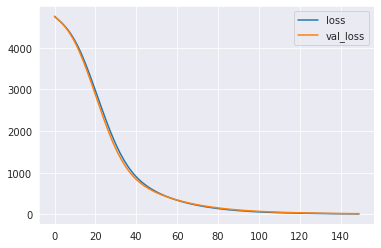

In [ ]:
loss.plot()

In [ ]:
ann.evaluate(xtrain, ytrain)

19/19 [==============================] - 0s 1ms/step - loss: 12.1064


12.106415748596191

In [ ]:
ann.evaluate(xtest, ytest)

13/13 [==============================] - 0s 1ms/step - loss: 17.8956


17.895553588867188

In [ ]:
ypred = ann.predict(xtest)


In [ ]:
dic = {"Actual Y":ytest, "Predicted Y":ypred.flatten()}

df1 = pd.DataFrame(dic)

In [ ]:
df1.head()

,Actual Y,Predicted Y
0,56.000000,54.340294
1,66.666667,63.536827
2,72.000000,72.193542
3,55.333333,57.258057
4,54.333333,48.785679


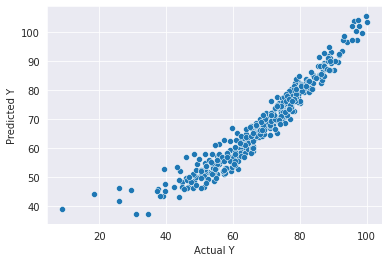

In [ ]:
sns.scatterplot(x="Actual Y", y="Predicted Y", data=df1)
plt.show()

In [ ]:
print(f"MSE -: {mean_squared_error(ytest, ypred)}")
print(f"RMSE -: {np.sqrt(mean_squared_error(ytest, ypred))}") 

MSE -: 17.89555280536726
RMSE -: 4.230313558752739


In [ ]:
ann = Sequential()
ann.add(Dense(units=30, activation="relu"))
ann.add(Dense(units=15, activation="relu"))
ann.add(Dense(units=10, activation="relu"))

ann.add(Dense(units=1))

ann.compile(optimizer="rmsprop", loss="mse")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20)

In [ ]:
ann.fit(xtrain, ytrain, epochs=600, validation_data=(xtest, ytest), callbacks=[earlystop])

Epoch 1/600
19/19 [==============================] - 1s 9ms/step - loss: 4604.4756 - val_loss: 4512.2681
Epoch 2/600
19/19 [==============================] - 0s 3ms/step - loss: 4395.4385 - val_loss: 4269.8589
Epoch 3/600
19/19 [==============================] - 0s 3ms/step - loss: 4127.6890 - val_loss: 3953.9019
Epoch 4/600
19/19 [==============================] - 0s 4ms/step - loss: 3784.5408 - val_loss: 3553.0383
Epoch 5/600
19/19 [==============================] - 0s 3ms/step - loss: 3356.8999 - val_loss: 3065.9543
Epoch 6/600
19/19 [==============================] - 0s 3ms/step - loss: 2849.0962 - val_loss: 2510.2493
Epoch 7/600
19/19 [==============================] - 0s 3ms/step - loss: 2278.1155 - val_loss: 1910.1785
Epoch 8/600
19/19 [==============================] - 0s 3ms/step - loss: 1690.8295 - val_loss: 1332.0039
Epoch 9/600
19/19 [==============================] - 0s 4ms/step - loss: 1153.0118 - val_loss: 859.1783
Epoch 10/600
19/19 [==============================] - 0s

In [ ]:
loss = pd.DataFrame(ann.history.history)
loss.head()

,loss,val_loss
0,4604.475586,4512.268066
1,4395.438477,4269.858887
2,4127.688965,3953.901855
3,3784.540771,3553.038330
4,3356.899902,3065.954346


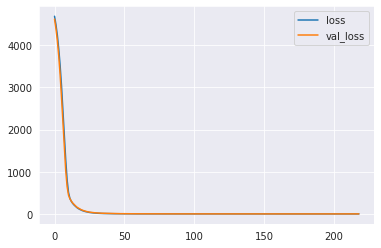

In [ ]:

lossdf.plot()

In [ ]:
ypred2 = ann.predict(xtest)

In [ ]:
dic2 = {"Actual Y":ytest, "Predicted Y":ypred2.flatten()}

df2 = pd.DataFrame(dic2)

In [ ]:
df2.head()

,Actual Y,Predicted Y
0,56.000000,55.613834
1,66.666667,66.474701
2,72.000000,71.658119
3,55.333333,55.522675
4,54.333333,53.979431


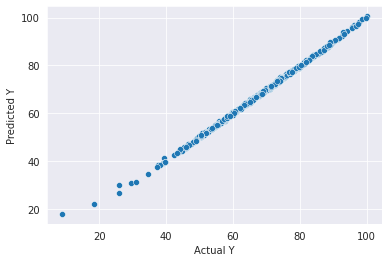

In [ ]:
sns.scatterplot(x="Actual Y", y="Predicted Y", data=df2)
plt.show()

In [ ]:
print(f"MSE -: {mean_squared_error(ytest, ypred2)}")
print(f"RMSE -: {np.sqrt(mean_squared_error(ytest, ypred2))}") 

MSE -: 0.4284955497908322
RMSE -: 0.6545957147666277
